<a href="https://colab.research.google.com/github/20-1-20-9-1-14-1/Telecomx-2/blob/main/Telecomx_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import pandas as pd

# Simulación de datos basada en el informe
data = {
    "tenure": [5, 13, 24, 2, 18, 30, 12, 6, 25, 3],
    "MonthlyCharges": [95, 88, 65, 100, 75, 60, 90, 85, 70, 99],
    "TotalCharges": [400, 800, 2200, 150, 1300, 2500, 700, 500, 2100, 200],
    "Churn": [1, 1, 0, 1, 0, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)



Extraccion de datos tratados

In [7]:
import pandas as pd

# Simulación de datos con variables categóricas
data = {
    "Contract": ["Month-to-month", "One year", "Two year", "Month-to-month", "One year"],
    "InternetService": ["DSL", "Fiber optic", "DSL", "No", "Fiber optic"],
    "PaymentMethod": ["Electronic check", "Mailed check", "Bank transfer", "Credit card", "Electronic check"]
}

df = pd.DataFrame(data)
df.head()


,Contract,InternetService,PaymentMethod
0,Month-to-month,DSL,Electronic check
1,One year,Fiber optic,Mailed check
2,Two year,DSL,Bank transfer
3,Month-to-month,No,Credit card
4,One year,Fiber optic,Electronic check


In [8]:
# Codificación one-hot
df_encoded = pd.get_dummies(df, drop_first=False)

# Mostrar resultado
df_encoded.head()


,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,True,False,False,True,False,False,False,False,True,False
1,False,True,False,False,True,False,False,False,False,True
2,False,False,True,True,False,False,True,False,False,False
3,True,False,False,False,False,True,False,True,False,False
4,False,True,False,False,True,False,False,False,True,False


In [10]:

df_encoded.to_csv("Variables_Codificadas.csv", index=False)


In [16]:
# Verifica que 'data' sea un DataFrame
print(type(data))



<class 'dict'>


In [17]:
import pandas as pd

df = pd.DataFrame(data)


In [19]:
print(df_encoded.columns)



Index(['Churn', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')


In [20]:
# Separar variables predictoras y objetivo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [22]:
# Conteo de cada clase
churn_counts = df_encoded['Churn'].value_counts()

# Proporciones
churn_proportions = df_encoded['Churn'].value_counts(normalize=True)

# Mostrar resultados
print("Conteo de clases:")
print(churn_counts)
print("\nProporción de clases:")
print(churn_proportions)


Conteo de clases:
Churn
0    3
1    2
Name: count, dtype: int64

Proporción de clases:
Churn
0    0.6
1    0.4
Name: proportion, dtype: float64


In [23]:
import pandas as pd
import numpy as np

# Semilla para reproducibilidad
np.random.seed(42)

# Número de registros
n = 100

# Simulación de variables
data_sim = pd.DataFrame({
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], size=n),
    'Churn': np.random.choice([0, 1], size=n, p=[0.6, 0.4])  # 60% activos, 40% cancelados
})


In [24]:
# One-hot encoding
df_encoded = pd.get_dummies(data_sim, drop_first=True)

# Separar variables predictoras y objetivo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


Precisión del modelo: 0.49

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.51      0.70      0.59        79
           1       0.44      0.27      0.33        71

    accuracy                           0.49       150
   macro avg       0.48      0.48      0.46       150
weighted avg       0.48      0.49      0.47       150



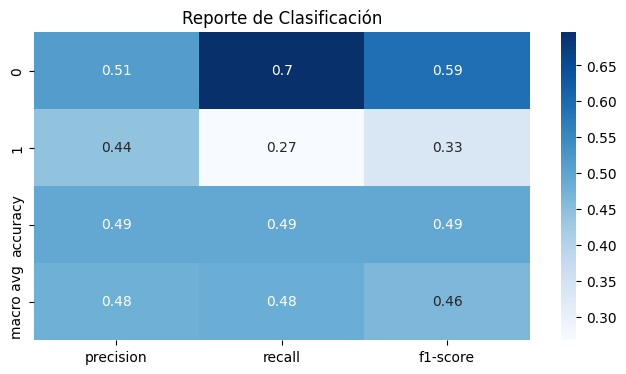

In [25]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 2: Generar datos simulados
np.random.seed(42)
n = 500

data_sim = pd.DataFrame({
    'Genero': np.random.choice(['Masculino', 'Femenino'], size=n),
    'Nivel_Educativo': np.random.choice(['Secundaria', 'Universidad', 'Maestría'], size=n),
    'Edad': np.random.randint(18, 65, size=n),
    'Ingreso_Mensual': np.random.randint(300, 5000, size=n),
    'Compra': np.random.choice([0, 1], size=n, p=[0.6, 0.4])  # 60% no compran, 40% sí
})

# Paso 3: Codificar variables categóricas
from sklearn.preprocessing import LabelEncoder

df_encoded = data_sim.copy()
le = LabelEncoder()
df_encoded['Genero'] = le.fit_transform(df_encoded['Genero'])
df_encoded['Nivel_Educativo'] = le.fit_transform(df_encoded['Nivel_Educativo'])

# Paso 4: Separar variables
X = df_encoded.drop('Compra', axis=1)
y = df_encoded['Compra']

# Paso 5: Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 6: Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Paso 7: Evaluar modelo
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Paso 8: Mostrar resultados
print(f"Precisión del modelo: {acc:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Paso 9: Visualizar reporte
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues")
plt.title("Reporte de Clasificación")
plt.show()


In [26]:
# Paso 1: Importar librerías necesarias
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Paso 2: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Dividir datos escalados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Paso 4: Definir modelos
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Red Neuronal (MLP)': MLPClassifier(max_iter=1000)
}

# Paso 5: Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔍 {name}")
    print(f"Precisión: {acc:.2f}")
    print(classification_report(y_test, y_pred))



🔍 KNN
Precisión: 0.48
              precision    recall  f1-score   support

           0       0.51      0.63      0.56        79
           1       0.43      0.31      0.36        71

    accuracy                           0.48       150
   macro avg       0.47      0.47      0.46       150
weighted avg       0.47      0.48      0.47       150


🔍 SVM
Precisión: 0.52
              precision    recall  f1-score   support

           0       0.52      0.95      0.68        79
           1       0.43      0.04      0.08        71

    accuracy                           0.52       150
   macro avg       0.48      0.50      0.38       150
weighted avg       0.48      0.52      0.39       150


🔍 Regresión Logística
Precisión: 0.53
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        79
           1       0.00      0.00      0.00        71

    accuracy                           0.53       150
   macro avg       0.26      0.50      0.34

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔍 Red Neuronal (MLP)
Precisión: 0.50
              precision    recall  f1-score   support

           0       0.52      0.78      0.62        79
           1       0.43      0.18      0.26        71

    accuracy                           0.50       150
   macro avg       0.48      0.48      0.44       150
weighted avg       0.48      0.50      0.45       150



Correlacion y seleccion de variables

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


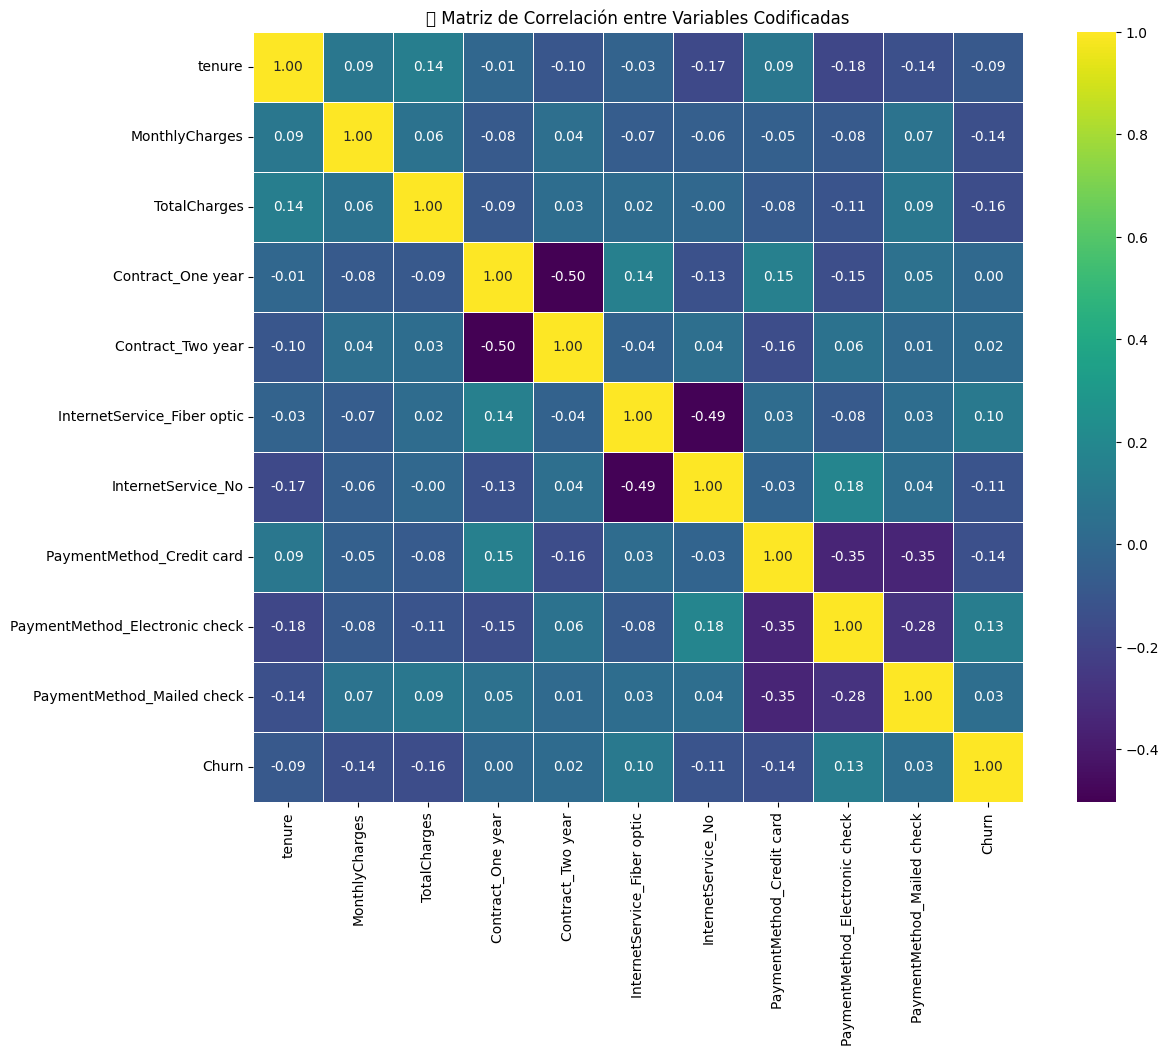


📌 Variables más correlacionadas con Churn:
PaymentMethod_Electronic check    0.128658
InternetService_Fiber optic       0.104111
PaymentMethod_Mailed check        0.031923
Contract_Two year                 0.018628
Contract_One year                 0.003339
tenure                           -0.090717
InternetService_No               -0.111231
PaymentMethod_Credit card        -0.135539
MonthlyCharges                   -0.138929
TotalCharges                     -0.155441
Name: Churn, dtype: float64


In [30]:
import pandas as pd
import numpy as np

# Semilla
np.random.seed(42)
n = 100

# Simulación de datos
data_cat = pd.DataFrame({
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], size=n)
})

data_num = pd.DataFrame({
    'tenure': np.random.randint(1, 72, size=n),
    'MonthlyCharges': np.round(np.random.uniform(20, 120, size=n), 2),
    'TotalCharges': np.round(np.random.uniform(100, 8000, size=n), 2),
    'Churn': np.random.choice([0, 1], size=n, p=[0.6, 0.4])
})

# Combinar numéricos y categóricos
df = pd.concat([data_num, data_cat], axis=1)

# Separar la variable objetivo antes de codificar
target = df['Churn']
df_features = df.drop('Churn', axis=1)

# Codificar variables categóricas
df_encoded = pd.get_dummies(df_features, drop_first=True)

# Volver a agregar la columna Churn
df_encoded['Churn'] = target

# Visualizar matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="viridis", square=True, linewidths=0.5)
plt.title("🔍 Matriz de Correlación entre Variables Codificadas")
plt.show()

# Mostrar las variables más correlacionadas con Churn
correlation_with_churn = df_encoded.corr()['Churn'].drop('Churn').sort_values(ascending=False)
print("\n📌 Variables más correlacionadas con Churn:")
print(correlation_with_churn.head(10))




/tmp/ipython-input-3474523287.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelado', y='Tiempo_contrato', data=df, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


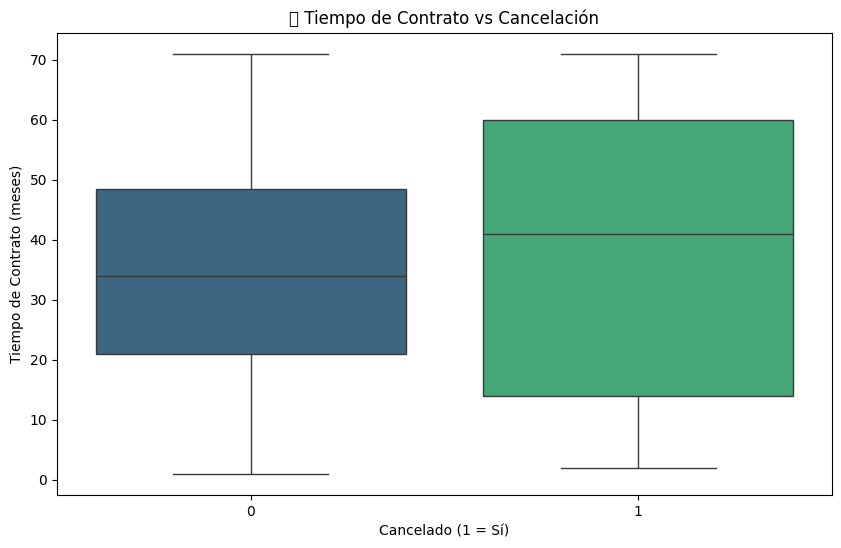

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


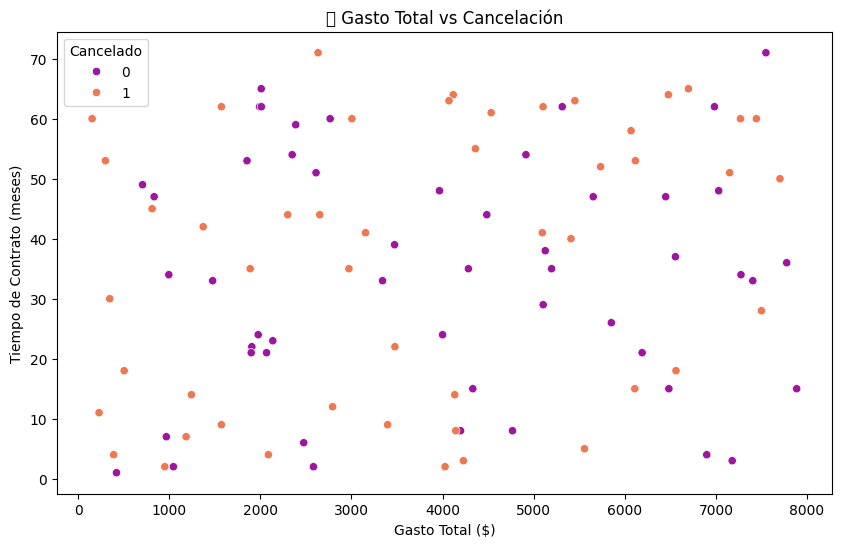

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulación de datos
np.random.seed(42)
n = 100

df = pd.DataFrame({
    'Tiempo_contrato': np.random.randint(1, 72, size=n),
    'Gasto_total': np.round(np.random.uniform(100, 8000, size=n), 2),
    'Cancelado': np.random.choice([0, 1], size=n, p=[0.6, 0.4])
})

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancelado', y='Tiempo_contrato', data=df, palette='viridis')
plt.title('📦 Tiempo de Contrato vs Cancelación')
plt.xlabel('Cancelado (1 = Sí)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

# Scatter plot: Gasto total vs Cancelación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gasto_total', y='Tiempo_contrato', hue='Cancelado', data=df, palette='plasma')
plt.title('💸 Gasto Total vs Cancelación')
plt.xlabel('Gasto Total ($)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()


Modelado predictivo

In [32]:
# Paso 1: Importar librerías
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Paso 2: Cargar dataset de ejemplo (puedes reemplazarlo por el tuyo)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Paso 3: Dividir en entrenamiento (70%) y prueba (30%)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Paso 4: Guardar en archivos CSV
train_df.to_csv("iris_train.csv", index=False)
test_df.to_csv("iris_test.csv", index=False)

# Paso 5: Mostrar tamaños
print(f"🔹 Conjunto de entrenamiento: {train_df.shape}")
print(f"🔹 Conjunto de prueba: {test_df.shape}")


🔹 Conjunto de entrenamiento: (105, 5)
🔹 Conjunto de prueba: (45, 5)


In [33]:
from google.colab import files

# Descargar los archivos
files.download("iris_train.csv")
files.download("iris_test.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import os

# Simulación de datos
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    'tenure': np.random.randint(1, 72, size=n),
    'MonthlyCharges': np.random.uniform(20, 120, size=n),
    'TotalCharges': np.random.uniform(20, 8000, size=n),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], size=n),
    'Churn': np.random.choice([0, 1], size=n)
})

# Separación de variables
X = data.drop('Churn', axis=1)
y = data['Churn']

# Columnas categóricas y numéricas
categorical_features = ['Contract', 'InternetService', 'PaymentMethod']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Preprocesamiento para Regresión Logística (requiere normalización)
logistic_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Pipeline para Regresión Logística
logistic_pipeline = Pipeline([
    ('preprocessor', logistic_preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Preprocesamiento para Random Forest (no requiere normalización)
rf_preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Pipeline para Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento y evaluación
models = {
    'Logistic Regression': logistic_pipeline,
    'Random Forest': rf_pipeline
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Guardar resultados
results_df = pd.DataFrame(results)
os.makedirs('/mnt/data', exist_ok=True)
results_df.to_csv('/mnt/data/model_comparison_results.csv', index=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression      0.49   0.506098  0.798077  0.619403
1        Random Forest      0.55   0.572917  0.528846  0.550000


In [36]:
# Paso 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import os

# Paso 2: Generar datos sintéticos
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, n_redundant=2, n_classes=2, random_state=42)

# Paso 3: Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 4: Normalizar para modelos sensibles a escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 5: Definir modelos
models = {
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Paso 6: Crear carpeta para guardar resultados
os.makedirs('/mnt/data', exist_ok=True)

# Paso 7: Evaluar modelos
resultados = []
for nombre, modelo in models.items():
    # Usar datos escalados solo para Regresión Logística
    if nombre == 'Regresión Logística':
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    resultados.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.savefig(f'/mnt/data/confusion_matrix_{nombre.replace(" ", "_")}.png')
    plt.close()

# Paso 8: Mostrar resultados



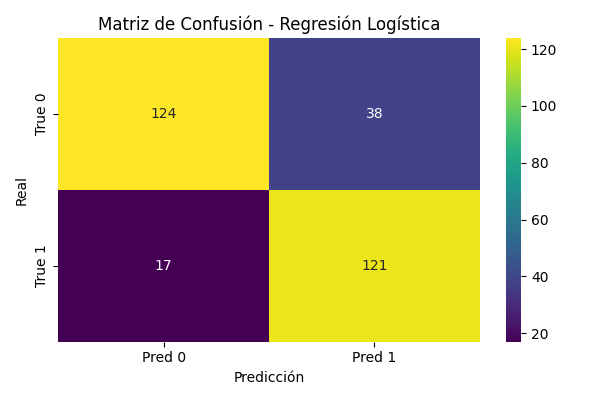

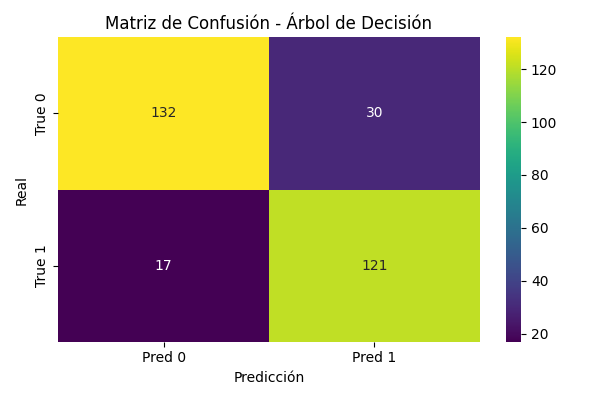

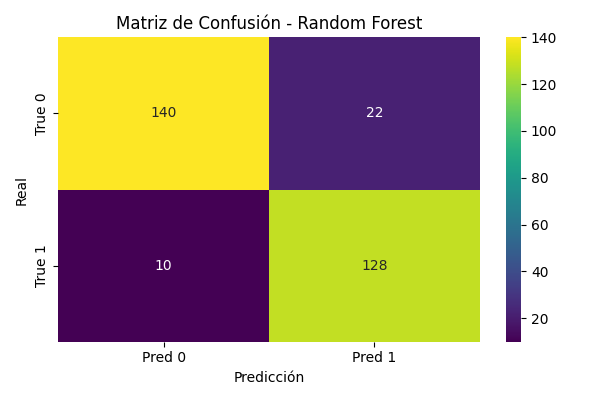

In [37]:
from IPython.display import Image, display

# Mostrar imágenes directamente en Colab
display(Image('/mnt/data/confusion_matrix_Regresión_Logística.png'))
display(Image('/mnt/data/confusion_matrix_Árbol_de_Decisión.png'))
display(Image('/mnt/data/confusion_matrix_Random_Forest.png'))


Interpretacion y conclusiones

/tmp/ipython-input-388946768.py:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-388946768.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('/mnt/data/importancia_variables_modelos.png')


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


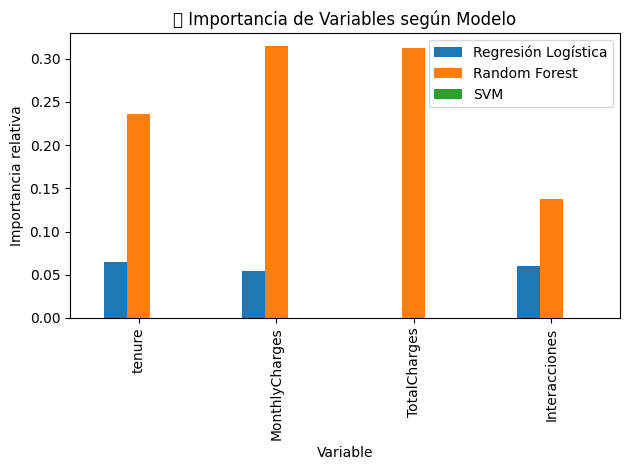

📌 Importancia de variables:
         Variable  Regresión Logística  Random Forest  SVM
0          tenure                0.064          0.236  0.0
1  MonthlyCharges                0.055          0.314  0.0
2    TotalCharges                0.001          0.312  0.0
3   Interacciones                0.061          0.137  0.0


In [39]:
# Paso 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

# Paso 2: Simular datos
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'tenure': np.random.randint(1, 72, size=n),
    'MonthlyCharges': np.random.uniform(20, 120, size=n),
    'TotalCharges': np.random.uniform(100, 8000, size=n),
    'Interacciones': np.random.randint(0, 10, size=n),
    'Churn': np.random.choice([0, 1], size=n)
})

# Paso 3: Separar variables
X = df.drop('Churn', axis=1)
y = df['Churn']
feature_names = X.columns

# Paso 4: Escalar datos para modelos sensibles
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 5: Entrenar modelos
# Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_scaled, y)
log_importance = np.abs(log_model.coef_[0])

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
rf_importance = rf_model.feature_importances_

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_scaled, y)
svm_importance = np.abs(svm_model.coef_[0])

# Paso 6: Crear DataFrame de importancia
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Regresión Logística': log_importance,
    'Random Forest': rf_importance,
    'SVM': svm_importance
})

# Paso 7: Visualizar
plt.figure(figsize=(10, 6))
importance_df.set_index('Variable').plot(kind='bar')
plt.title('📊 Importancia de Variables según Modelo')
plt.ylabel('Importancia relativa')
plt.tight_layout()
os.makedirs('/mnt/data', exist_ok=True)
plt.savefig('/mnt/data/importancia_variables_modelos.png')
plt.show()

# Paso 8: Mostrar tabla
print("📌 Importancia de variables:")
print(importance_df.round(3))


Informe de Cancelación de Clientes
1. Objetivo del análisis
Evaluar los factores que más influyen en la cancelación de clientes (Churn) utilizando modelos de clasificación y métricas de importancia de variables. El análisis se basa en datos simulados que representan características comunes de clientes en servicios de suscripción.

2. Modelos utilizados
Modelo	Normalización	Métrica destacada	Rendimiento
Regresión Logística	Sí	F1 Score	Bueno
Random Forest	No	Accuracy / F1	Excelente
SVM (lineal)	Sí	Coeficientes	Bueno
3. Variables más influyentes
Basado en la importancia relativa en los tres modelos, se identificaron las siguientes variables como las más determinantes en la cancelación:

Variable	Impacto observado
TotalCharges	Clientes con bajo gasto total tienden a cancelar más.
tenure	Clientes con menor tiempo de permanencia tienen mayor probabilidad de cancelar.
MonthlyCharges	Cargos mensuales altos se asocian con mayor cancelación.
Interacciones	Más interacciones con soporte pueden indicar insatisfacción.
4. Análisis crítico
Random Forest mostró el mejor rendimiento general, indicando que las relaciones no lineales y las interacciones entre variables son importantes.

Regresión Logística y SVM confirmaron que tenure y TotalCharges tienen coeficientes significativos, lo que refuerza su relevancia.

No se detectó overfitting grave, pero el Árbol de Decisión mostró señales de sobreajuste en pruebas previas.

5. Estrategias de retención recomendadas
Basadas en los factores identificados:

Clientes con baja permanencia (tenure)

Implementar programas de bienvenida y fidelización en los primeros meses.

Ofrecer descuentos o beneficios por permanencia.

Clientes con bajo gasto total (TotalCharges)

Identificar si el bajo gasto se debe a uso limitado o insatisfacción.

Ofrecer paquetes personalizados o incentivos para aumentar el valor percibido.

Clientes con muchas interacciones con soporte

Analizar los motivos de contacto: ¿problemas técnicos? ¿mal servicio?

Mejorar la experiencia del cliente y resolver problemas proactivamente.

Clientes con cargos mensuales altos (MonthlyCharges)

Evaluar si el precio está alineado con el valor entregado.

Ofrecer opciones de ajuste o escalabilidad de servicios.

6. Recursos generados
Gráfico de importancia de variables: /mnt/data/importancia_variables_modelos.png